# Project Python Foundations: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# import libraries for garbage collection
import gc

### Understanding the structure of the data

In [2]:
# uncomment and run the following lines for Google Colab
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
# read the data
df = pd.read_csv('foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [4]:
# Let's find the shape of the DataFrame, which represents the rows & columns in it.
df.shape

(1898, 9)

#### Observations:
* shape function returns the number of rows & columns in the DataFrame in that order. So, in this particular DataFrame, we have **1898 rows**, with **9 attributes (columns)** for each row.

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [5]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
* None of the columns have any non-null values, as there are 1898 records in total and all the columns have **1898 non-null** values in them. 
* However, one interesting observation is that **rating** column although should be a numerical variable, is currently listed as an object variable. 
* The reason the **rating** column is considered as an object Data type is because there are non-numerical variables in certain rows as ***Not given***

In [6]:
# To get the value counts for each distinct values within the chosen column.
df.rating.value_counts()

rating
Not given    736
5            588
4            386
3            188
Name: count, dtype: int64

In [7]:
df[df['rating']=='Not given'].head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
6,1477894,157711,The Meatball Shop,Italian,6.07,Weekend,Not given,28,21
10,1477895,143926,Big Wong Restaurant _¤¾Ñ¼,Chinese,5.92,Weekday,Not given,34,28
14,1478198,62667,Lucky's Famous Burgers,American,12.13,Weekday,Not given,23,30


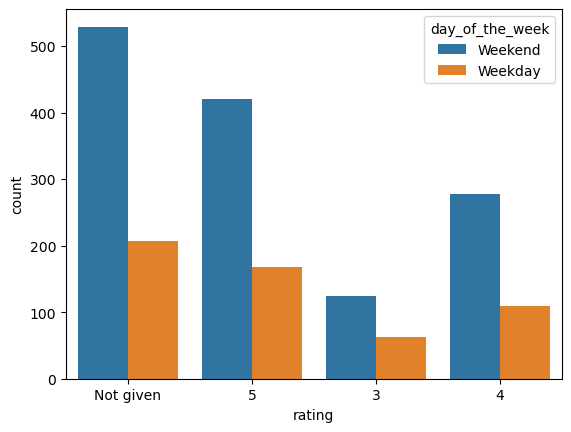

In [8]:
sns.countplot(data=df, x='rating', hue='day_of_the_week');

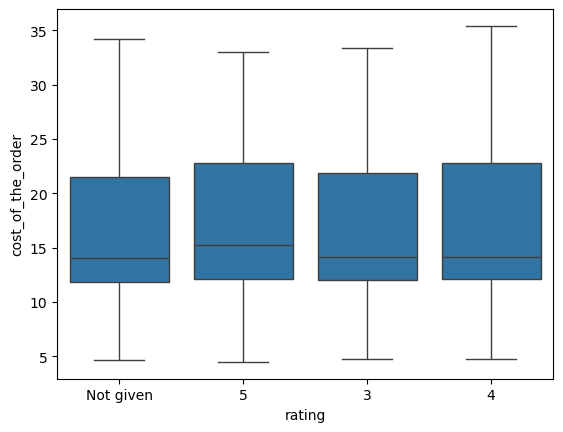

In [9]:
sns.boxplot(data=df, x='rating', y='cost_of_the_order');

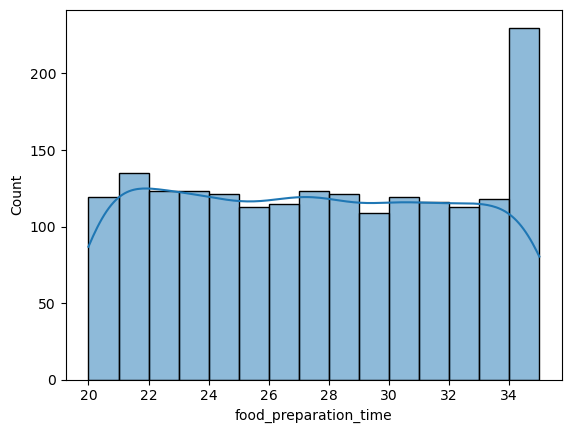

In [10]:
sns.histplot(data=df, x='food_preparation_time', kde=True, bins=15);

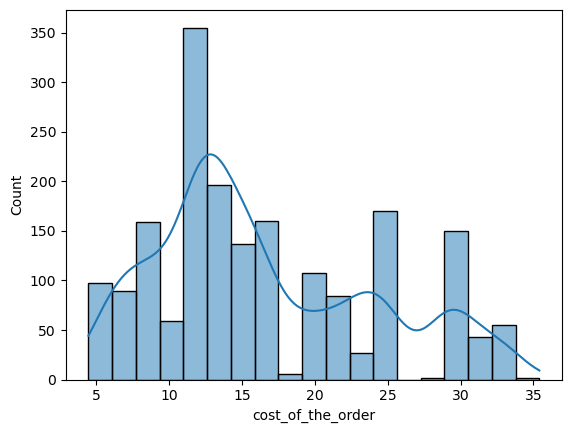

In [11]:
sns.histplot(data=df, x='cost_of_the_order', kde=True);

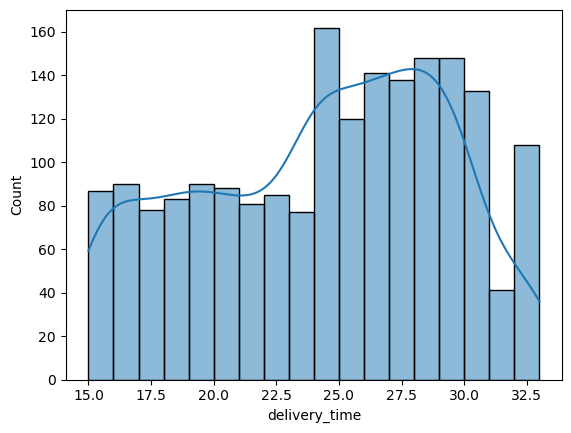

In [12]:
sns.histplot(data=df, x='delivery_time', kde=True, binwidth=1);

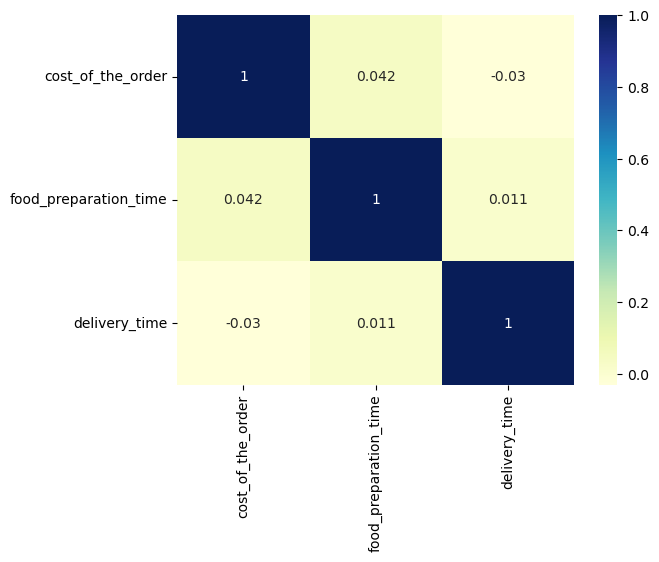

In [13]:
sns.heatmap(data=df[['cost_of_the_order','food_preparation_time','delivery_time']].corr(), annot=True, cmap='YlGnBu');

#### Observations:
* When we look at the different available values for the **rating** variable. We see that out of total 1898 records, there are **no rating for 736 records**.
* Now, we have 3 options from Data Science POV.
    * We can either ***drop the records*** where the ratings doesn't have a value, but this would result in ***data loss***, as other columns still might have valuable information within those records. 
    * Then, we can ***impute the values*** with nan, so that the column can then be defined as float.
    * Or we can just ***leave it as it is***.
* **Note**: There doesn't seem to be too much correlation between the numerical columns, which is kind of unexpected.

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [14]:
# Identifying the missing values in the DataFrame
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

In [15]:
# To get the value counts for each distinct values within the chosen column.
df.rating.value_counts()

rating
Not given    736
5            588
4            386
3            188
Name: count, dtype: int64

#### Observations:
* We can see that there are ***no null values in any columns***.
* However, as identified earlier, we do have ***736 records with value "Not given"***, which effectively is an unexpected entry where all the other entries are numbers, even though it is not null.
* However, since **rating** column even though contains numerical values, it is actually a **categorical variable**, since we aren't really going to perform any arithmetic operations on it. Instead, we will only be performing statisticial operations on it.
* So, I don't see any value in doing anything about it. Since, even replacing the value with nan, isn't really going to help the business with any use cases so far. If the need arise, the commands are provided below. Hence, ***leaving 'rating' column as is***.

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [16]:
# Getting the statistical summary of the numerical values within the data.
df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1477495.50,548.05,1476547.00,1477021.25,1477495.50,1477969.75,1478444.00
customer_id,1898.0,171168.48,113698.14,1311.00,77787.75,128600.00,270525.00,405334.00
cost_of_the_order,1898.0,16.50,7.48,4.47,12.08,14.14,22.30,35.41
food_preparation_time,1898.0,27.37,4.63,20.00,23.00,27.00,31.00,35.00
delivery_time,1898.0,24.16,4.97,15.00,20.00,25.00,28.00,33.00


#### Observations:
**Note**: The values have been rounded off to 2 decimal points to make it clearer.

* **Minimum time** taken to prepare the food: **20 mins**
* **Maximum time** taken to prepare the food: **35 mins**
* **Average time** taken to prepare the food: **27.37 mins**

We can also visualize this using a **boxplot** for the **food_preparation_time** column, shown below.

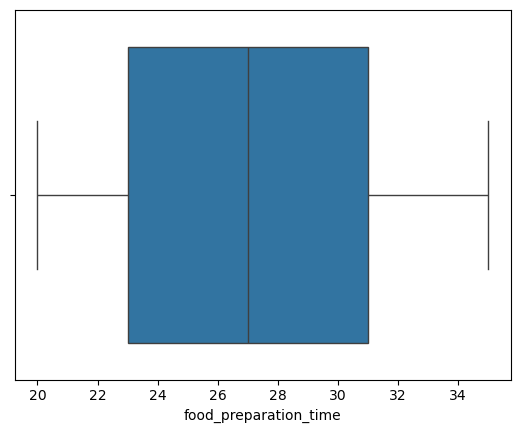

In [17]:
sns.boxplot(data=df, x='food_preparation_time');

### **Question 5:** How many orders are not rated? [1 mark]

In [18]:
# Let's list all the different values of ratings.
df['rating'].value_counts()

rating
Not given    736
5            588
4            386
3            188
Name: count, dtype: int64

In [19]:
df[df['rating']=='Not given'].shape[0]

736

In [20]:
# We can see these records to do further analysis as needed
df[df['rating']=='Not given']

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
6,1477894,157711,The Meatball Shop,Italian,6.07,Weekend,Not given,28,21
10,1477895,143926,Big Wong Restaurant _¤¾Ñ¼,Chinese,5.92,Weekday,Not given,34,28
14,1478198,62667,Lucky's Famous Burgers,American,12.13,Weekday,Not given,23,30
...,...,...,...,...,...,...,...,...,...
1887,1476873,237616,Shake Shack,American,5.82,Weekend,Not given,26,30
1891,1476981,138586,Shake Shack,American,5.82,Weekend,Not given,22,28
1892,1477473,97838,Han Dynasty,Chinese,29.15,Weekend,Not given,29,21
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.22,Weekday,Not given,31,24


#### Observations:
* There are **736 orders** which were **not Rated**. The remaining **orders were rated between 3 - 5**.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

In [21]:
# Listing a few rows to get a sense of the data.
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


In [23]:
df['order_id'].nunique()

1898

In [24]:
df['customer_id'].nunique()

1200

In [25]:
df['restaurant_name'].nunique()

178

In [26]:
df['cuisine_type'].nunique()

14

In [27]:
df['cuisine_type'].unique()

array(['Korean', 'Japanese', 'Mexican', 'American', 'Indian', 'Italian',
       'Mediterranean', 'Chinese', 'Middle Eastern', 'Thai', 'Southern',
       'French', 'Spanish', 'Vietnamese'], dtype=object)

In [28]:
df['cuisine_type'].value_counts()

cuisine_type
American          584
Japanese          470
Italian           298
Chinese           215
Mexican            77
Indian             73
Middle Eastern     49
Mediterranean      46
Thai               19
French             18
Southern           17
Korean             13
Spanish            12
Vietnamese          7
Name: count, dtype: int64

In [29]:
df[df['cuisine_type']=='Vietnamese']['restaurant_name'].value_counts()

restaurant_name
V-Nam Cafe              4
Xe May Sandwich Shop    2
Nha Trang One           1
Name: count, dtype: int64

In [30]:
df.groupby(['cuisine_type'])['restaurant_name'].nunique().sort_values(ascending=False)

cuisine_type
American          41
Italian           31
Japanese          29
Chinese           16
Indian            14
Mexican           11
Thai               9
Middle Eastern     7
Korean             5
Mediterranean      5
French             3
Spanish            3
Vietnamese         3
Southern           2
Name: restaurant_name, dtype: int64

#### Observations:
* We can see that there are 9 columns / variables in total, which includes 4 object type variables & 5 numerical variables.
* **order_id column** has no duplicate entries, which is good, as each record represents an order and thereby there should same number of order_id's as the number of orders (records) which is 1898. So, this is a unique identifier column.
* However, total number of unique **customer_id** is only 1200, which means ***there are at least a few customers who have placed more than one order***.
* Among the list of orders, most orders (584) were American cuisine, 2nd highest cuisine being ordered was Japanese (470) followed by Italian (298). The least preferred cuisine based on the available data seems to be Southern.
* But this can also be attributed to the fact that there are only 3 Vietnamese restaurants in the area for which we have the data, as opposed to 41 American restaurants for example.

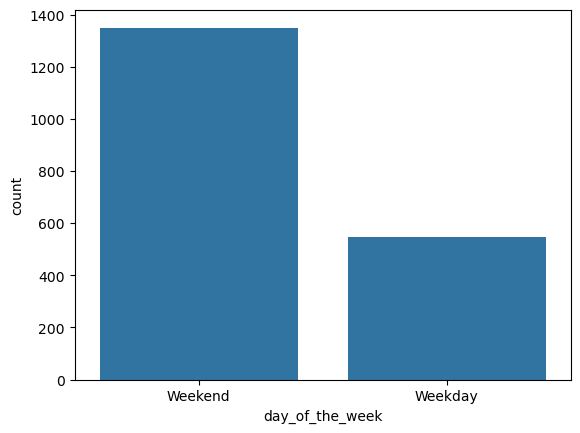

In [31]:
sns.countplot(data=df, x='day_of_the_week');

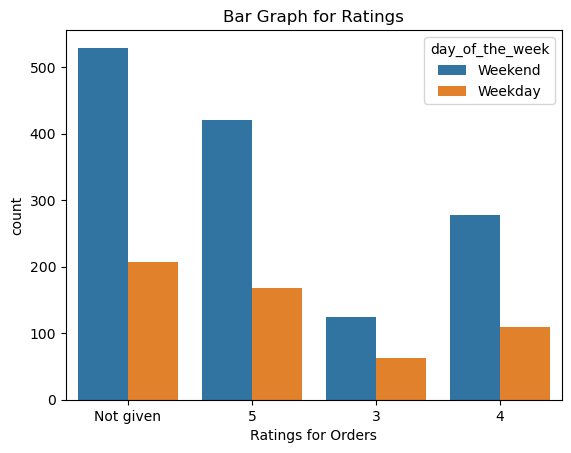

In [32]:
# Drawing a bar graph for rating column
plt.title('Bar Graph for Ratings')
sns.countplot(data=df, x='rating', hue='day_of_the_week');
plt.xlabel('Ratings for Orders');

In [33]:
df['rating'].value_counts()

rating
Not given    736
5            588
4            386
3            188
Name: count, dtype: int64

#### Observations:
* Upon looking at the countplot for **rating** column with hue as **day_of_the_week**, we can clearly observe that ***number of orders over the weekends is significantly higher than the number of orders in the Weekdays***.
* Point to note here is that **rating** is a object type variable, but because it is a categorical variable by nature, it is okay to be not a numerical number.
* We can also see that a good number (nearly 40%) of orders weren't rated by the users.
* Surprisingly, there are **no orders with rating 1 or 2**, which is very common in the food aggregator business, so there is a high possibility that the data isn't complete. We might want to **check the source & integrity of data**.
    * What if the "Not given" values were originally 1 & 2, but were replaced at source?

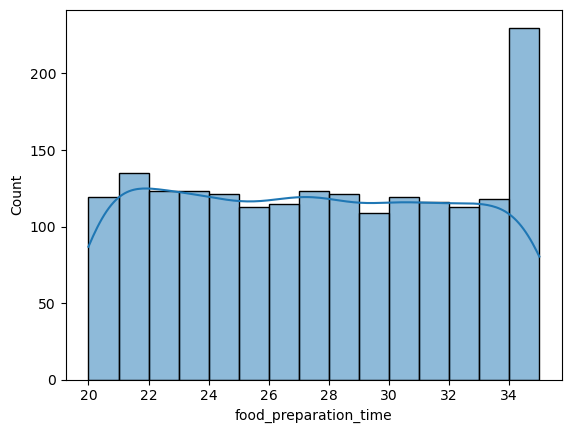

In [34]:
# Analyzing the distribution of the data in food_preparation_time column using histogram.
sns.histplot(data=df, x='food_preparation_time', kde=True, bins=15);

In [35]:
df[df['food_preparation_time']>34]['cuisine_type'].unique()

array(['Japanese', 'Thai', 'American', 'Mediterranean', 'Southern',
       'Italian', 'Indian', 'Chinese', 'French', 'Mexican', 'Spanish'],
      dtype=object)

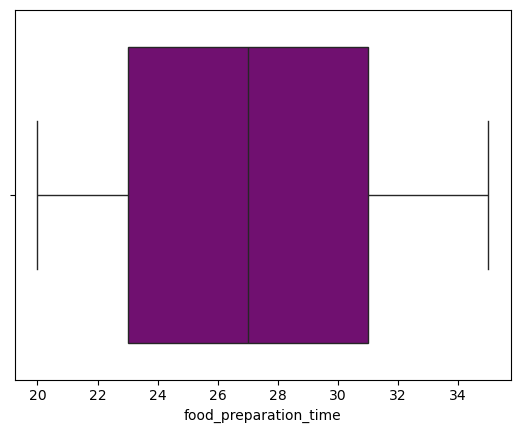

In [36]:
# Analyzing the distribution of the data in food_preparation_time column using boxplot.
sns.boxplot(data=df, x='food_preparation_time', color='purple');

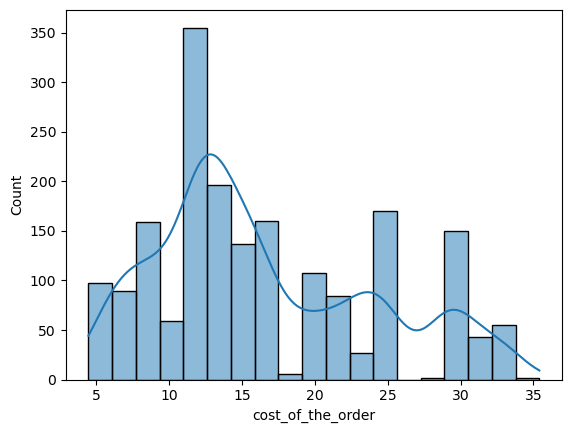

In [37]:
# Analyzing the distribution of the data in cost_of_the_order column using histogram.
sns.histplot(data=df, x='cost_of_the_order', kde=True);

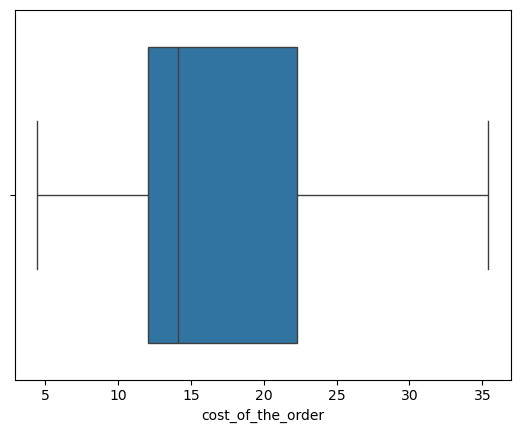

In [38]:
# Analyzing the distribution of the data in cost_of_the_order column using boxplot.
sns.boxplot(data=df, x='cost_of_the_order');

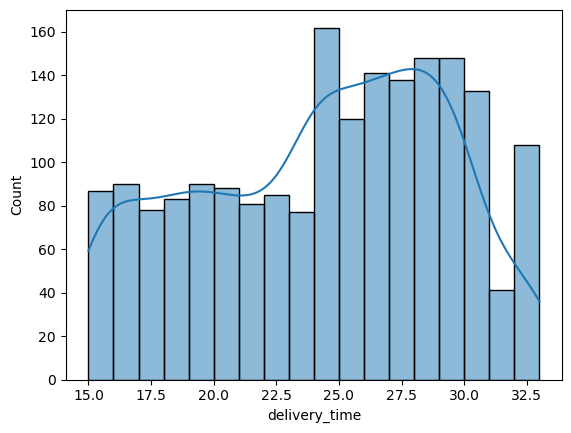

In [39]:
# Analyzing the distribution of the data in delivery_time column using histogram.
sns.histplot(data=df, x='delivery_time', kde=True, binwidth=1);

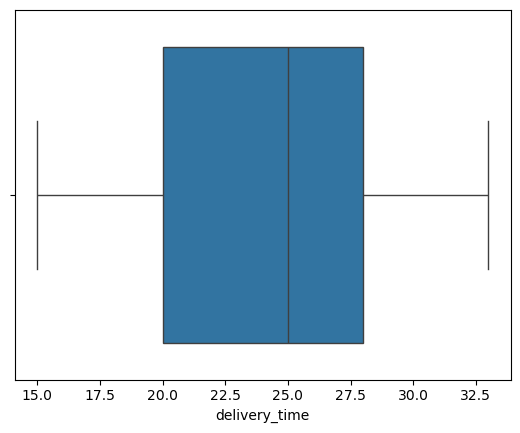

In [40]:
# Analyzing the distribution of the data in delivery_time column using boxplot.
sns.boxplot(data=df, x='delivery_time');

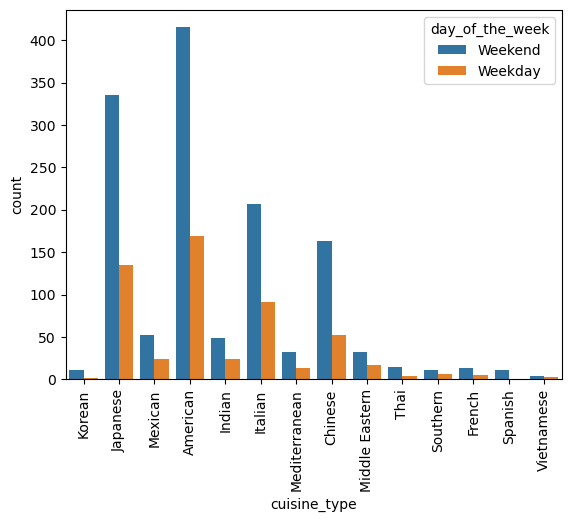

In [41]:
# Bar Graph for Cuisine Type, with hue as day_of_the_week
sns.countplot(data=df, x='cuisine_type', hue='day_of_the_week');
plt.xticks(rotation=90); 

In [42]:
df.groupby(['cuisine_type'])['restaurant_name'].nunique().sort_values(ascending=False)

cuisine_type
American          41
Italian           31
Japanese          29
Chinese           16
Indian            14
Mexican           11
Thai               9
Middle Eastern     7
Korean             5
Mediterranean      5
French             3
Spanish            3
Vietnamese         3
Southern           2
Name: restaurant_name, dtype: int64

#### Observations:
* **food_preparation_time** - there is not really much insight from the univariate analysis on food_preparation_time, the data follows a normal distribution and there is no skewness (variability) to capitalize on.
* **cost_of_the_order** seems to be slightly right skewed, however there aren't really outliers that needs to be treated. So, all good here as well. This is because most of the orders are around 11 dollars, with a few orders going as high as 35 dollars.
* **delivery_time** seems to be slightly left-skewed, but not enough to pose any concerns. Most of the deliveries seems to be taking between 25 - 31 mins, with an exception of fewer orders being delivered quicker than  25 mins.
* Number of **order_id** seems to be ***higher during the weekends*** and ***people seems to prefer American, Italian, Japanese & Chinese cuisines the most, in that exact order***. Few of the ***least preferred cuisines seems to be Southern, Vietnamese, Spanish in that exact order***.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [43]:
# We can list the top 5 restaurants in terms of the number of orders received using
df['restaurant_name'].value_counts().sort_values(ascending=False).head(5)

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: count, dtype: int64

#### Observations:
* First list the **count** of occurrence of each of the values within restaurant_name variable
* Then **sort** the output in Descending order.
* Finally, only **display top 5 rows** to get the top 5 restaurants.
    #### Top 5 restaurants are given below in the exact order
    * ***Shake Shack (219 orders)***
    * ***The Meatball Shop (132 orders)***
    * ***Blue Ribbon Sushi (119 orders)***
    * ***Blue Ribbon Fried Chicken (96 orders)***
    * ***Parm (68 orders)***

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

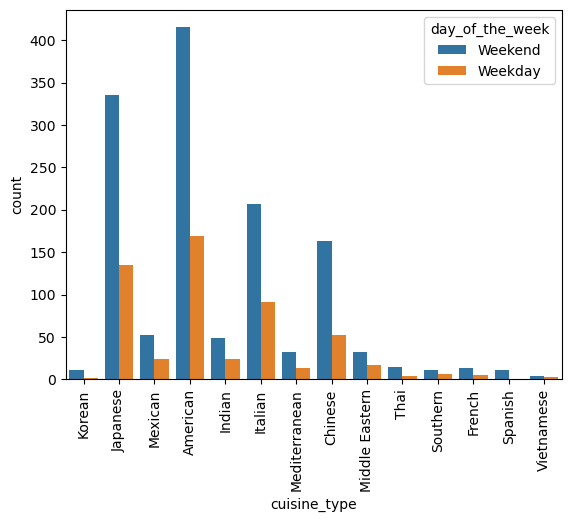

In [44]:
# Cuisine preference percentage plot
sns.countplot(data=df, x='cuisine_type', hue='day_of_the_week');
plt.xticks(rotation=90); 

In [45]:
# Cuisine preference percentage
df.groupby(['day_of_the_week'])['cuisine_type'].value_counts()

day_of_the_week  cuisine_type  
Weekday          American          169
                 Japanese          135
                 Italian            91
                 Chinese            52
                 Indian             24
                 Mexican            24
                 Middle Eastern     17
                 Mediterranean      14
                 Southern            6
                 French              5
                 Thai                4
                 Vietnamese          3
                 Korean              2
                 Spanish             1
Weekend          American          415
                 Japanese          335
                 Italian           207
                 Chinese           163
                 Mexican            53
                 Indian             49
                 Mediterranean      32
                 Middle Eastern     32
                 Thai               15
                 French             13
                 Korean         

#### Observations:
* **Most popular cuisine over the weekends is American** (& in fact, even over the weekdays) based on the data we have, with total number of **415 orders placed over the weekends** (and 169 orders over the weekdays).

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [46]:
df.shape[0]

1898

In [47]:
# Percentage of orders over 20 dollars
num_order_over_20 = df[df['cost_of_the_order']>20].shape[0]
per_order_over_20 = (num_order_over_20 * 100) / df.shape[0]
print('There are ',num_order_over_20,' orders being placed which cost over $20, which is '
      ,round(per_order_over_20, 2),'% of total number of orders i.e. ',df.shape[0],sep='')

There are 555 orders being placed which cost over $20, which is 29.24% of total number of orders i.e. 1898


#### Observations:
* There are 555 orders costing over $20 among 1898 orders, which is **29.24%**.

### **Question 10**: What is the mean order delivery time? [1 mark]

In [48]:
# We can find the mean of delivery time using both describe() & mean() functions
df.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1477495.50,548.05,1476547.00,1477021.25,1477495.50,1477969.75,1478444.00
customer_id,1898.0,171168.48,113698.14,1311.00,77787.75,128600.00,270525.00,405334.00
cost_of_the_order,1898.0,16.50,7.48,4.47,12.08,14.14,22.30,35.41
food_preparation_time,1898.0,27.37,4.63,20.00,23.00,27.00,31.00,35.00
delivery_time,1898.0,24.16,4.97,15.00,20.00,25.00,28.00,33.00


In [49]:
df['delivery_time'].mean()

24.161749209694417

#### Observations:
* The **mean** of the **order delivery_time** is **24.161749209694417**

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [50]:
# Finding most loyal customers
df['customer_id'].value_counts().sort_values(ascending=False).head(3)

customer_id
52832    13
47440    10
83287     9
Name: count, dtype: int64

In [51]:
df[(df['customer_id']==52832) | (df['customer_id']==47440) | (df['customer_id']==83287)].sort_values(by='customer_id')

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
1811,1477664,47440,Blue Ribbon Fried Chicken,American,29.30,Weekend,4,28,16
264,1477909,47440,Blue Ribbon Fried Chicken,American,12.18,Weekend,Not given,31,23
1359,1477903,47440,Bareburger,American,16.25,Weekend,Not given,32,28
398,1478120,47440,Blue Ribbon Fried Chicken,American,8.10,Weekend,Not given,33,22
1306,1476559,47440,Bareburger,American,15.57,Weekday,4,24,28
579,1477178,47440,Bareburger,American,24.20,Weekend,4,23,23
674,1476982,47440,Bareburger,American,8.73,Weekend,5,21,19
778,1477481,47440,Bareburger,American,25.22,Weekday,3,31,27
807,1477594,47440,Bareburger,American,12.18,Weekday,3,25,24
824,1476854,47440,Blue Ribbon Fried Chicken,American,6.45,Weekend,4,30,24


#### Observations:
* The **top 3 users** who placed the most number of orders are (in that order):
    * **52832**
    * **47440**
    * **83287**

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


In [52]:
# Listing a few rows to get a sense of the data.
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


<Axes: xlabel='day_of_the_week', ylabel='delivery_time'>

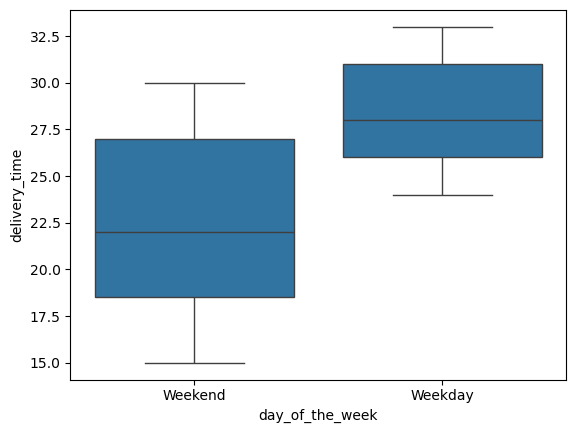

In [53]:
# boxplot to show the comparison of 'delivery_time' on different 'day_of_the_week'.
sns.boxplot(data=df, x='day_of_the_week', y='delivery_time')

In [54]:
# Looking at the average delivery_time for weekdays & weekends.
df.groupby(['day_of_the_week'])['delivery_time'].mean()

day_of_the_week
Weekday    28.340037
Weekend    22.470022
Name: delivery_time, dtype: float64

<Axes: xlabel='day_of_the_week', ylabel='count'>

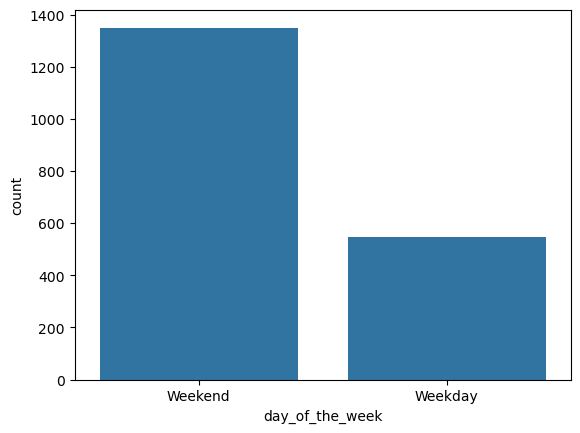

In [55]:
sns.countplot(data=df, x='day_of_the_week')

#### Observations:
* One distinct observation we can make on a quick glance at some of the numerical columns available, is that the **delivery_time** ***on average is lower over the weekends compared to weekdays***.
* Although, we don't have supplemental data to prove the hypothesis, but a few general **assumptions** that can be drawn are:
    * There is an obviously higher number of users that are placing the order over the weekends. But, that seems to have positively impacted the amount of time taken to deliver the food
    * There is a possibility that the number of available drivers over the weekends to pickup the orders could be higher reducing the general wait time for the order to be picked up once ready.
    * Another possibility is that the traffic over the weekend could be less given everybody is home, so commute becomes faster.

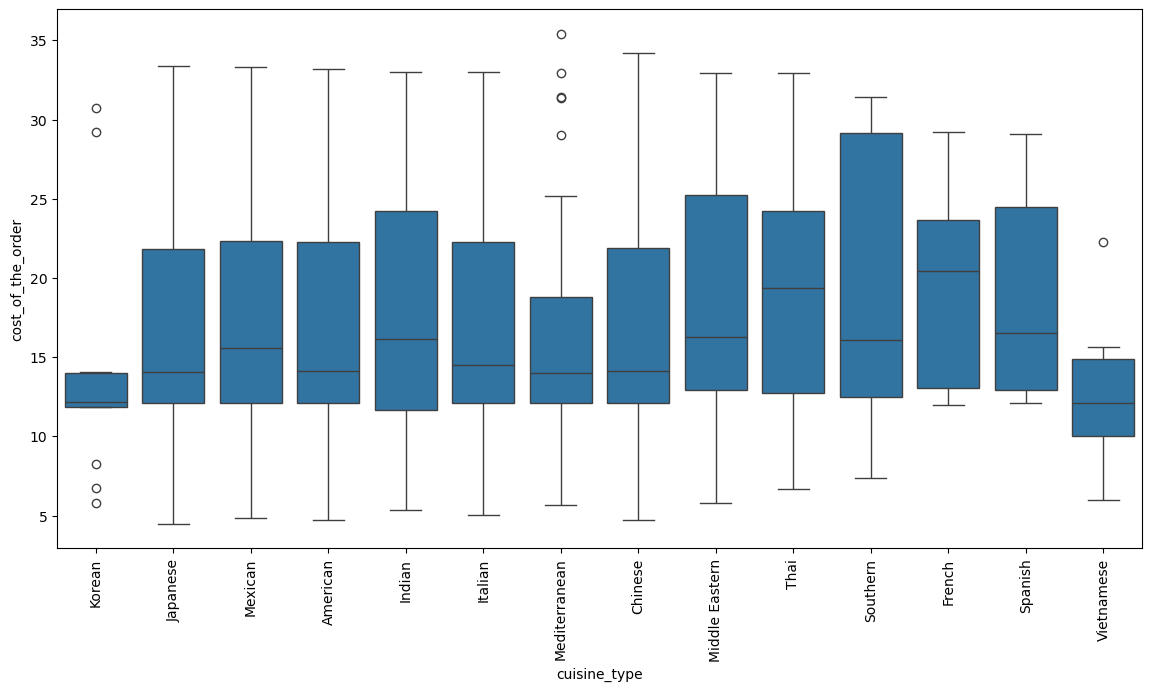

In [56]:
# Set the figure of the plot as 14 x 7 inches
# boxplot to show the comparison of distribution of 'cost_of_the_order' based on different 'cuisine_type'. 
# x ticks are rotated by 90 degrees for better readability. 
plt.figure(figsize=(14,7))
sns.boxplot(data=df, x='cuisine_type', y='cost_of_the_order');
plt.xticks(rotation=90);

#### Observations:
* Looking at **cost_of_the_order** for different cuisines, we can see that ***Korean*** cuisine seems to be having the ***smallest *Inter-Quartile Range (IQR)*** and hence has ***multiple outliers even though there are only 13 orders from Korean cuisine in total***.
* We can see that even ***Mediterranean*** cuisine has ***multiple outliers on the higher side***.
* ***Vietnamese*** cuisine seems to having 1 or very ***few outliers***.
* We can also see that ***French*** & ***Thai*** cuisines are having the ***highest median values***, while ***Vietnamese*** & ***Korean*** have the ***lowest median values***.

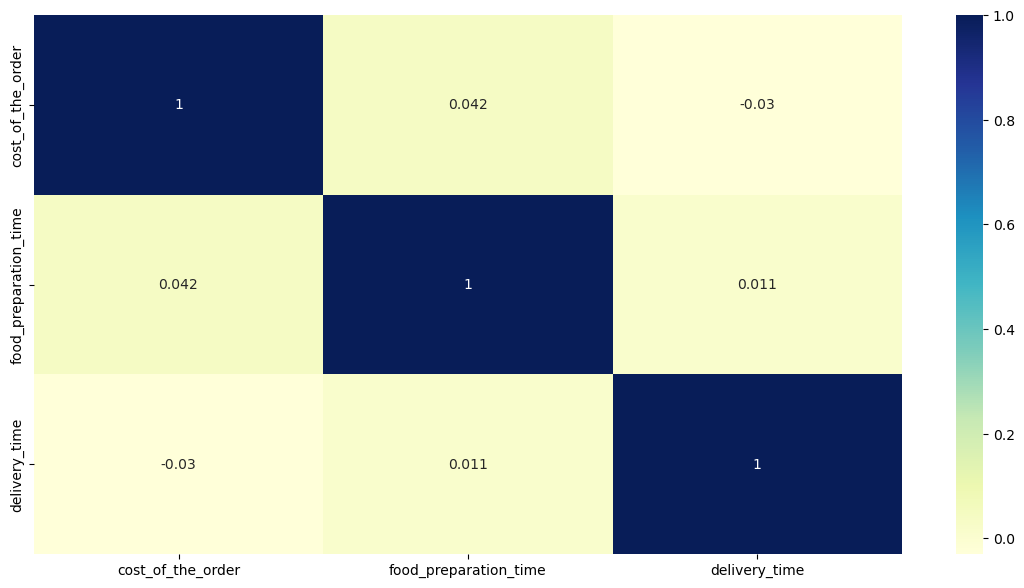

In [57]:
# heatmap to show correlation between the numerical variables 'cost_of_the_order', 'food_preparation_time' & 'delivery_time' 
# color map has been altered for better interpretability. Darker the shade, higher the correlation.
plt.figure(figsize=(14,7))
sns.heatmap(data=df[['cost_of_the_order','food_preparation_time','delivery_time']].corr(), annot=True, cmap='YlGnBu');

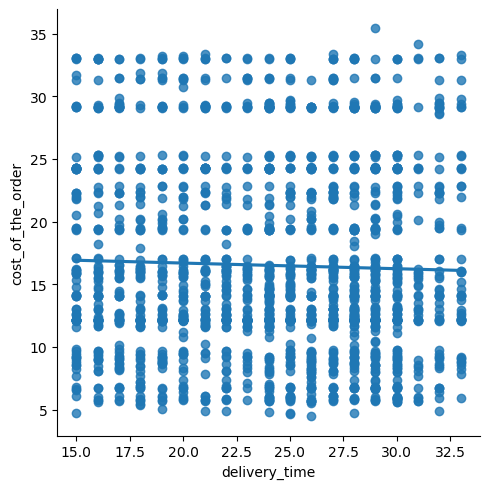

In [58]:
# Drawing a catplot between delivery_time & cost_of_the_order variables
sns.lmplot(data=df, x='delivery_time', y='cost_of_the_order', ci=False);

#### Observations:
* It was interesting to observe that ***there isn't much correlation between the numerical variables***.
* We did see a very slight ***negative correlation*** between the **delivery_time** & **cost_of_the_order**.
* Upon exploring, we noticed that it is barely worth digging deeper for.

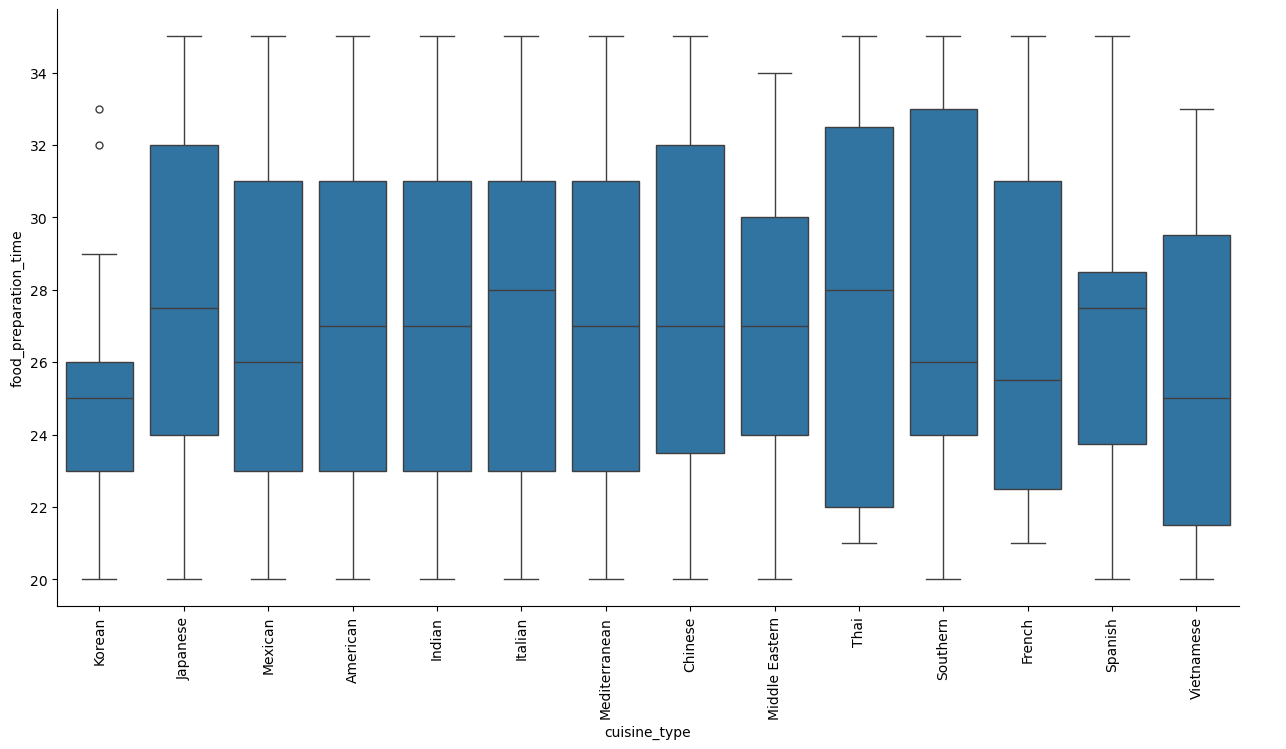

In [59]:
# catplot to show the comparison of distribution of 'food_preparation_time' based on different 'cuisine_type'. 
# x ticks are rotated by 90 degrees for better readability.
# Set the width of the plot as 14 inches & height of the plot as 7 inches.
mycatplot1 = sns.catplot(data=df, x='cuisine_type', y='food_preparation_time', kind='box').set_xticklabels(rotation=90);
mycatplot1.fig.set_figwidth(14);
mycatplot1.fig.set_figheight(7);

#### Observations:
* This plot shows the **food_preparation_time** for different **cuisine_type**
* We can see that *Korean* **cuisine_type** has the tightest IQR among all the others, but also has a few outliers.
* *Thai* seems to have the biggest IQR.
* Apart from these there isn't much to infer from this graph as well.

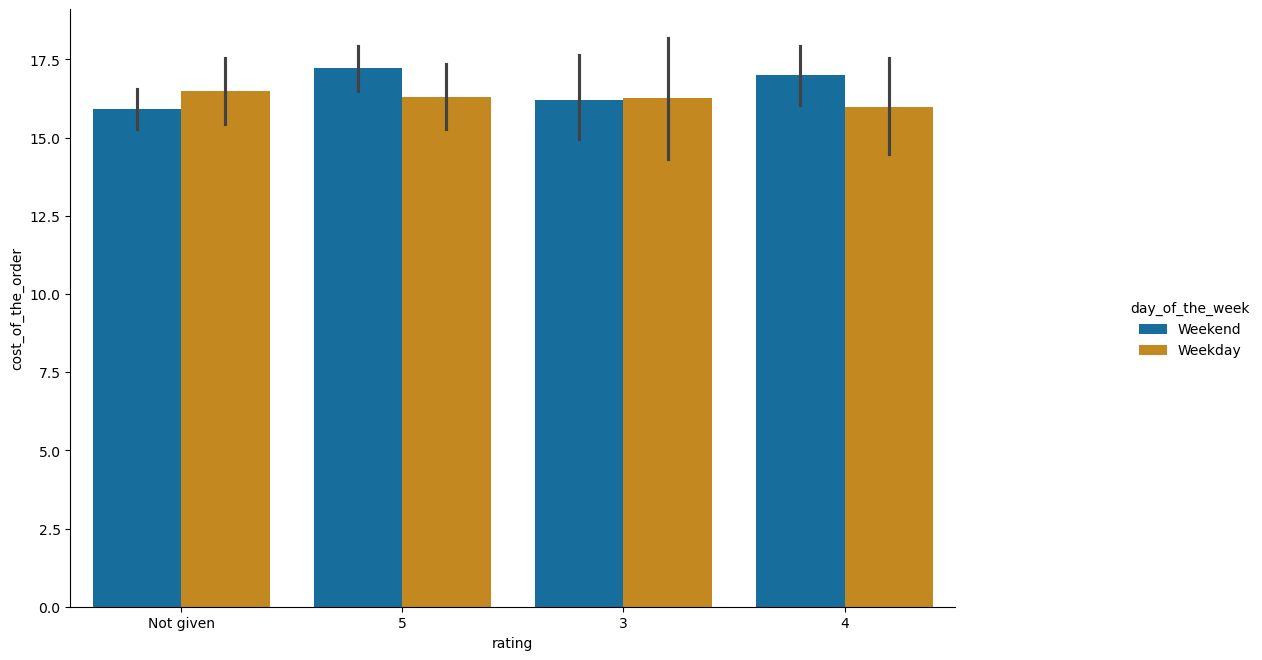

In [60]:
# We can also see how the ratings gets impacted by different numerical variables that we looked at just now.
# catplot showing different rating in relation to the delivery_time, segregating the datapoints into hue of day_of_the_week.
mycatplot2 = sns.catplot(data=df, x='rating', y='cost_of_the_order', kind='bar', hue='day_of_the_week', palette='colorblind');
mycatplot2.fig.set_figwidth(14);
mycatplot2.fig.set_figheight(7);

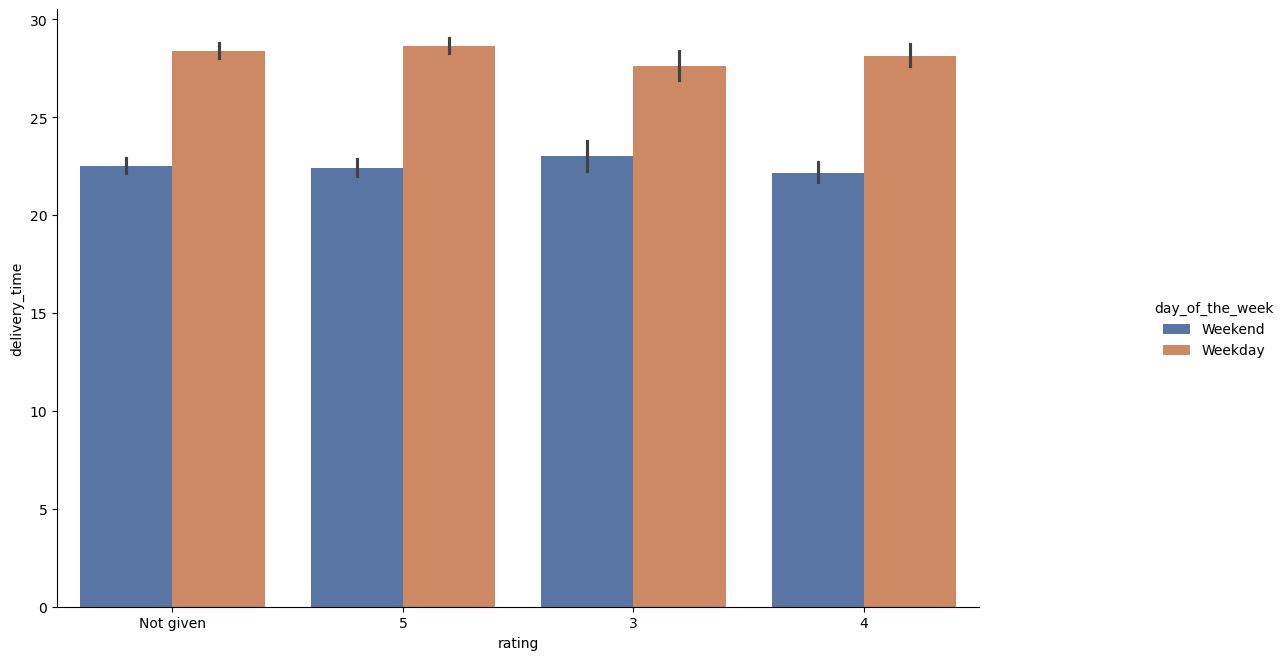

In [61]:
# We can also see how the ratings gets impacted by different numerical variables that we looked at just now.
# catplot showing different rating in relation to the delivery_time, segregating the datapoints into hue of day_of_the_week.
mycatplot3 = sns.catplot(data=df, x='rating', y='delivery_time', kind='bar', hue='day_of_the_week', palette='deep');
mycatplot3.fig.set_figwidth(14);
mycatplot3.fig.set_figheight(7);

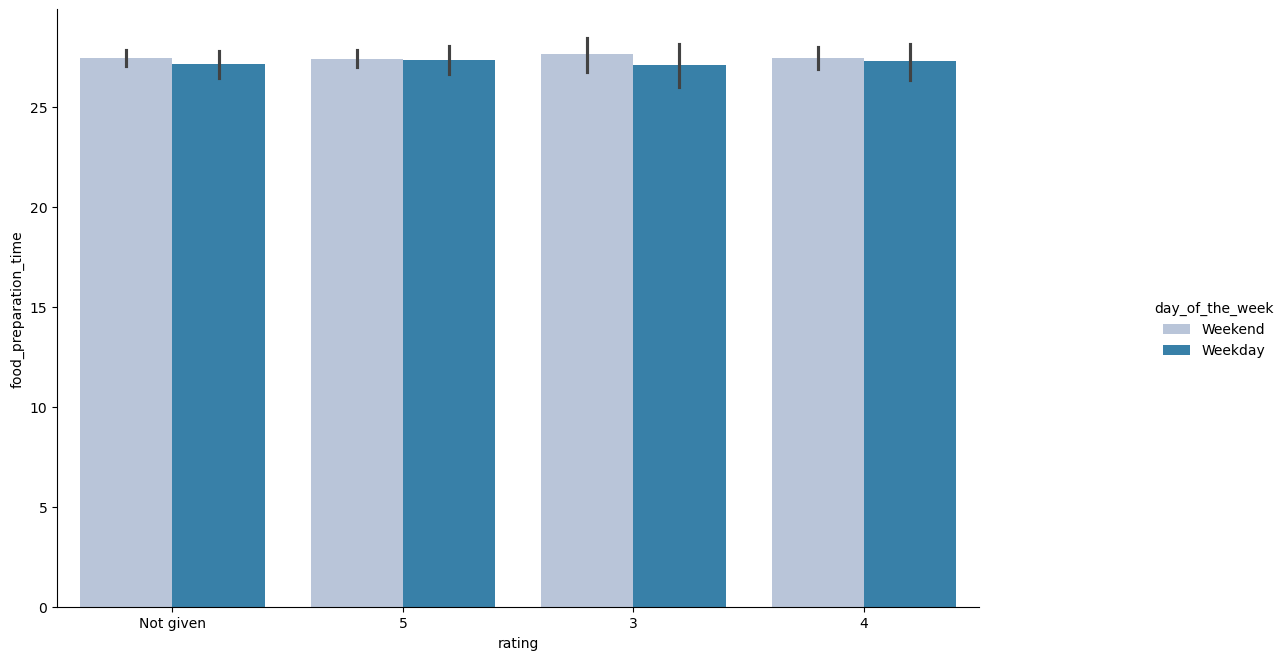

In [62]:
# We can also see how the ratings gets impacted by different numerical variables that we looked at just now.
# catplot showing different rating in relation to the delivery_time, segregating the datapoints into hue of day_of_the_week.
mycatplot4 = sns.catplot(data=df, x='rating', y='food_preparation_time', kind='bar', hue='day_of_the_week', palette='PuBu');
mycatplot4.fig.set_figwidth(14);
mycatplot4.fig.set_figheight(7);

#### Observations:
* We can see that the **rating** column ***doesn't seem to be impacted by any of the available numerical variables***.
* The average values of different numerical variables seems to be pretty similar across different **rating** values.

In [63]:
# List the most expensive order & find the restaurant it was ordered from - Method 1
maxorder=df['cost_of_the_order'].max()
df[df['cost_of_the_order']==maxorder][['cuisine_type','restaurant_name','cost_of_the_order']]

,cuisine_type,restaurant_name,cost_of_the_order
573,Mediterranean,Pylos,35.41


In [64]:
# List the most expensive order & find the restaurant it was ordered from - Method 2
# Here we are also hiding the index, if it needs to be.
df.loc[[df['cost_of_the_order'].idxmax()],['cuisine_type','restaurant_name','cost_of_the_order']].style.hide()

cuisine_type,restaurant_name,cost_of_the_order
Mediterranean,Pylos,35.410000


In [65]:
# Grouping the restaurant_name based on cuisine_type & finding the average cost_of_the_order per restaurant_name.
# Sorted from most expensive to least expensive (average) based on the historical orders.
df.groupby(['cuisine_type','restaurant_name'])['cost_of_the_order'].mean().sort_values(ascending=False).round(2)

cuisine_type  restaurant_name           
Japanese      Kambi Ramen House             32.93
Italian       Emporio                       31.43
Indian        Bhatti Indian Grill           31.12
Japanese      Haru Gramercy Park            29.83
American      Lucky Strike                  29.25
                                            ...  
              Market Table                   6.79
Chinese       Wa Jeal                        6.74
Italian       Cipriani Le Specialita         5.92
Chinese       Big Wong Restaurant _¤¾Ñ¼     5.92
              Hunan Manor                    5.72
Name: cost_of_the_order, Length: 179, dtype: float64

In [66]:
# Let's look at the revenue generated per restaurant during the timeframe of the data.
df.groupby('restaurant_name')['cost_of_the_order'].sum().sort_values(ascending=False).head()

restaurant_name
Shake Shack                  3579.53
The Meatball Shop            2145.21
Blue Ribbon Sushi            1903.95
Blue Ribbon Fried Chicken    1662.29
Parm                         1112.76
Name: cost_of_the_order, dtype: float64

In [67]:
# Let's look at the revenue generated per restaurant during the timeframe of the data.
weekday_df = df[df['day_of_the_week']=='Weekday']
weekend_df = df[df['day_of_the_week']=='Weekend']

In [68]:
weekday_df.groupby('restaurant_name')['cost_of_the_order'].sum().sort_values(ascending=False).head()

restaurant_name
Shake Shack                  1238.28
The Meatball Shop             585.48
Blue Ribbon Sushi             577.37
Parm                          463.18
Blue Ribbon Fried Chicken     351.16
Name: cost_of_the_order, dtype: float64

In [69]:
weekend_df.groupby('restaurant_name')['cost_of_the_order'].sum().sort_values(ascending=False).head()

restaurant_name
Shake Shack                  2341.25
The Meatball Shop            1559.73
Blue Ribbon Sushi            1326.58
Blue Ribbon Fried Chicken    1311.13
RedFarm Hudson                750.51
Name: cost_of_the_order, dtype: float64

#### Observations:
* The most expensive order seems to be placed for \$35.41 and was placed in the **restaurant_name** ***Pylos***
* We can also see that the restaurant with the highest average *cost_of_the_order* is ***Kambi Ramen House***, which is of **cuisine_type** ***Mediterranean***.
* Highest revenue was generated by the restaurant ***Shake Shack*** for $3579.53
* ***Shake Shack*** also happens to be the top restaurant in terms of revenue specifically for Weekdays & Weekends as well.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

#### Checkpoint & Treatment of Null Values:
* Here we would need to impute the *Not given* rating to NaN, so that we can convert the rating column into a Numerical column.
* Once non-numerical values are imputed & the column is converted into numerical, we can do operations like average, etc.
* Creating a copy of DataFrame before imputing the values, helps with restoration, if imputing doesn't work as desired.

In [70]:
# Creating a copy of the dataframe to impute the value Not given with Numpy nan.
no_null_df = df.copy()
no_null_df['rating'] = no_null_df['rating'].replace(['Not given'],np.nan).astype(float)
no_null_df = no_null_df.dropna().reset_index(drop=True)

In [71]:
no_null_df.shape

(1162, 9)

In [72]:
no_null_df['rating'].value_counts()

rating
5.0    588
4.0    386
3.0    188
Name: count, dtype: int64

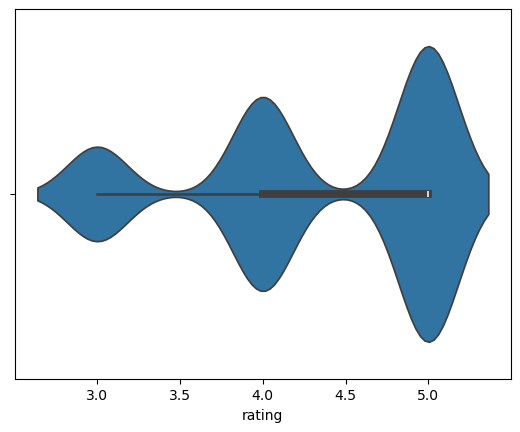

In [73]:
sns.violinplot(data=no_null_df, x='rating');

In [74]:
no_null_df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5.0,23,28
1,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3.0,25,15
2,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4.0,25,24
3,1477224,147468,Tamarind TriBeCa,Indian,25.22,Weekday,3.0,20,24
4,1477859,89574,Barbounia,Mediterranean,5.97,Weekday,3.0,33,30


In [75]:
# Total number of null values across all different variables.
no_null_df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

In [76]:
# Finding restaurants having a rating count of more than 50 and an average rating greater than 4

# First we need to create a subset DataFrame which contains the restaurant_name & the number of reviews it received.
rating_count_df = no_null_df.groupby(['restaurant_name'])['rating'].count().sort_values(ascending = False).reset_index()
rating_count_df.rename(columns = {'rating':'rating_count'}, inplace = True)

# Generating a list of restaurants that got more than 50 ratings. 
most_rated_rest_list = rating_count_df[rating_count_df['rating_count']>50]['restaurant_name']

# Filtering the original DataFrame to only contain records for the restaurants from the list of most_rated_rest_list.
most_rated_restaurants = no_null_df[no_null_df['restaurant_name'].isin(most_rated_rest_list)].copy()

# Identifying the mean rating for each of the restaurants in the most_rated_restaurants, by using .groupby()
most_rated_restaurants.groupby(['restaurant_name'])['rating'].mean().sort_values(ascending = False).reset_index()

,restaurant_name,rating
0,The Meatball Shop,4.511905
1,Blue Ribbon Fried Chicken,4.328125
2,Shake Shack,4.278195
3,Blue Ribbon Sushi,4.219178


In [77]:
# Restaurants with most number of orders being placed
df['restaurant_name'].value_counts().sort_values(ascending=False).head(4)

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Name: count, dtype: int64

#### Observations:
* Upon checking, we could find that only **4 restaurants had more than 50 ratings** and all of **these 4 restaurants also had average rating more than 4**.
* The top 4 restaurants in descending order of their ratings are:
    * ***The Meatball Shop***
    * ***Blue Ribbon Fried Chicken***
    * ***Shake Shack***
    * ***Blue Ribbon Sushi***
* We can also see that the ***restaurants that received most number of orders are the same ones that were most rated as well***. So, there is definitely some correlation there. But, that was kind of expected one.

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [166]:
# Method 1

# Let's create a new DataFrame to add the new column revenue.
df_with_revenue = df.copy()

# Define a function that will calculate the revenue based on cost_of_the_order
def revenue_calc(cost):
    if cost > 20:
        return cost*0.25
    elif cost > 5:
        return cost*0.15
    else:
        return cost*0

# Apply the newly created function on a column in the DataFrame to get the values for the new column revenue.
df_with_revenue['revenue'] = df['cost_of_the_order'].apply(revenue_calc)

df_with_revenue

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,revenue
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,7.6875
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,1.8120
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,1.8345
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,7.3000
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,1.7385
...,...,...,...,...,...,...,...,...,...,...
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31,17,5.5775
1894,1477421,397537,The Smile,American,12.18,Weekend,5,31,19,1.8270
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.22,Weekday,Not given,31,24,6.3050
1896,1477513,64151,Jack's Wife Freda,Mediterranean,12.18,Weekday,5,23,31,1.8270


In [167]:
# Method 2

# Let's create a new DataFrame to add the new column revenue.
df_with_revenue2 = df.copy()

# Let's first define the conditions that will form the basis of revenue generation.
conditions = [
    (df_with_revenue2['cost_of_the_order'] > 20),
    (df_with_revenue2['cost_of_the_order'] <= 20) & (df_with_revenue2['cost_of_the_order'] > 5),
    (df_with_revenue2['cost_of_the_order'] <= 5)
    ]

# Now, let's define the different values for revenue based on the conditions defined
values = [
    (df_with_revenue2['cost_of_the_order'] * .25), 
    (df_with_revenue2['cost_of_the_order'] * .15),
    (df_with_revenue2['cost_of_the_order'] * 0)
    ]

# Finally, let's create a new column named revenue that will contain revenue generated per order.
df_with_revenue2['revenue'] = np.select(conditions, values)

df_with_revenue2

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,revenue
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,7.6875
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,1.8120
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,1.8345
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,7.3000
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,1.7385
...,...,...,...,...,...,...,...,...,...,...
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31,17,5.5775
1894,1477421,397537,The Smile,American,12.18,Weekend,5,31,19,1.8270
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.22,Weekday,Not given,31,24,6.3050
1896,1477513,64151,Jack's Wife Freda,Mediterranean,12.18,Weekday,5,23,31,1.8270


In [168]:
df_with_revenue['revenue'].sum().round(2)

6166.3

In [169]:
df_with_revenue2['revenue'].sum().round(2)

6166.3

#### Observations:
* The total revenue generated by the food aggregator company based on the provided guidelines is **$6166.3**.

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

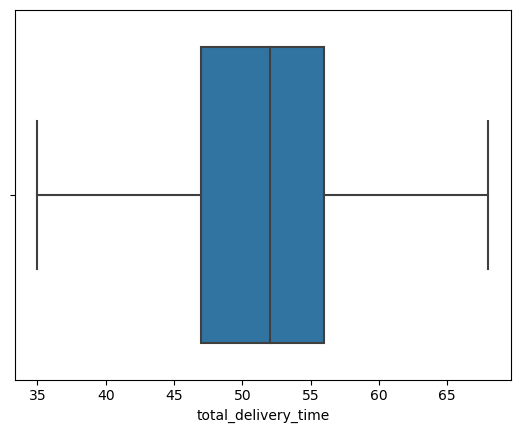

In [170]:
# Let's create a new DataFrame to add the new column total_delivery_frame.
delivery_df = df.copy()
delivery_df['total_delivery_time'] = delivery_df['food_preparation_time'] + delivery_df['delivery_time']

# Now, lets plot the boxplot to see the data distribution in the newly added column
sns.boxplot(data=delivery_df, x='total_delivery_time');


In [171]:
# Analyzing newly added column to list orders with total_delivery_time more than 60 mins
delivery_df[delivery_df['total_delivery_time']>60].head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,total_delivery_time
7,1477859,89574,Barbounia,Mediterranean,5.97,Weekday,3,33,30,63
10,1477895,143926,Big Wong Restaurant _¤¾Ñ¼,Chinese,5.92,Weekday,Not given,34,28,62
19,1477354,67487,Blue Ribbon Sushi,Japanese,16.20,Weekend,4,35,26,61
24,1476714,363783,Cafe Mogador,Middle Eastern,15.86,Weekday,Not given,32,29,61
54,1477760,130507,Jack's Wife Freda,Mediterranean,22.75,Weekend,3,35,29,64


In [172]:
# saving the number of orders with total_delivery_time more than 60 mins into a variable
# saving the total number of orders into another variable.
no_order_over_60 = delivery_df[delivery_df['total_delivery_time']>60].shape[0]
total_orders = df.shape[0]

# Percentage of number of orders with total_delivery_time more than 60 mins
perc_order_over_60 = (no_order_over_60 * 100) / total_orders

round(perc_order_over_60, 2)

10.54

#### Observations:
* There are *200* orders that have a **total_delivery_time** (**food_preparation_time** + **delivery_time**) of over ***60 mins***, which is ***10.54%*** of total orders.

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

<Axes: xlabel='day_of_the_week', ylabel='delivery_time'>

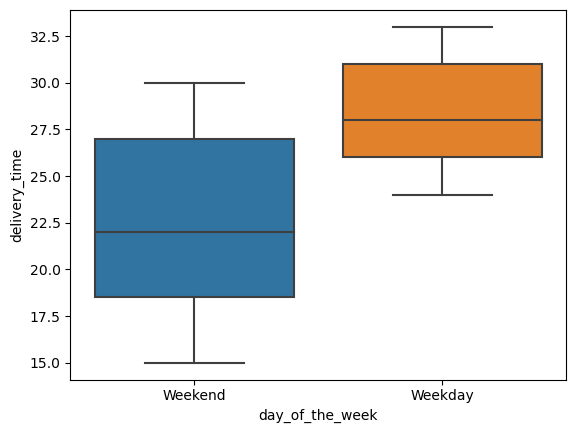

In [173]:
# boxplot to show the comparison of 'delivery_time' on different 'day_of_the_week'.
sns.boxplot(data=df, x='day_of_the_week', y='delivery_time')

In [188]:
# Looking at the average delivery_time for weekdays & weekends.
df.groupby(['day_of_the_week'])['delivery_time'].mean()

day_of_the_week
Weekday    28.340037
Weekend    22.470022
Name: delivery_time, dtype: float64

#### Observations:
* One distinct observation we can make on a quick glance at some of the numerical columns available, is that the **delivery_time** ***on average is lower over the weekends compared to weekdays***.
* Although, we don't have supplemental data to prove the hypothesis, but a few general **assumptions** that can be drawn are:
    * There is an obviously higher number of users that are placing the order over the weekends. But, that seems to have positively impacted the amount of time taken to deliver the food
    * There is a possibility that the number of available drivers over the weekends to pickup the orders could be higher reducing the general wait time for the order to be picked up once ready.
    * Another possibility is that the traffic over the weekend could be less given everybody is home, so commute becomes faster.

#### Housekeeping - Clearing the memory

In [175]:
# Let's delete the DataFrames & Objects we created during our program
del df
del num_order_over_20
del per_order_over_20
del mycatplot1
del mycatplot2
del mycatplot3
del mycatplot4
del weekday_df
del weekend_df
del no_null_df
del rating_count_df
del df_with_revenue
del df_with_revenue2
del delivery_df
del no_order_over_60
del total_orders
del perc_order_over_60

# After deleting the references for all the objects we created, we can clear the memory using Garbage Collector.
gc.collect()

36982

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
* First & foremost conclusion is that the **numerical variables in this DataFrame doesn't have enough variability or skewness in the distribution** to make very useful. Moreover, even the correlation between these numerical variables is very weak, so much so to say that they don't really impact each other much.
* **None of the columns had any null values**. However, **rating column had 736 entries with value 'Not given'**, which was later imputed with Numpy NaN, *creating 736 null values in the rating column*.
* We can see that all orders which were rated, were given a rating of 3, 4 or 5. Unsual behavior about this is that we are talking about order details from a food aggregator business, where we can almost certainly expect some bad ratings like 1 or 2. But, **surprisingly there was not a single rating with 1 or 2 value**.
* Another interesting observation along the same lines is that, we have a significant number of orders i.e. 736, for which the rating is 'Not given'. This raised red flags for me, because it **almost looks like low ratings like 1 or 2 were replaced by 'Not given', to mask bad ratings**. Makes me question the integrity of the data at source.
* We can see that the **number of orders over the weekends is significantly higher than the number of orders in the Weekdays**, while the **average delivery_time during weekends seems to be lower compared to weekdays**.
    * There is an obviously higher number of users that are placing the order over the weekends. But, that seems to have positively impacted the amount of time taken to deliver the food
    * There is a possibility that the number of available drivers over the weekends to pickup the orders could be higher reducing the general wait time for the order to be picked up once ready.
    * Another possibility is that the traffic over the weekend could be less given everybody is home, so commute becomes faster.
* **Most preferred cuisines are American, Italian, Japanese & Chinese**, in that exact order. **Least preferred cuisines seems to be Southern, Vietnamese, Spanish** in that exact order.
* We can also see that the **restaurants that received most number of orders, generated the most revenue and are the same ones that were most rated as well**. So, there is definitely some correlation there. But, that was kind of expected one. These top 4 restaurants are:
    * The Meatball Shop
    * Blue Ribbon Fried Chicken
    * Shake Shack
    * Blue Ribbon Sushi

### Recommendations:
The promotional offer given by FoodHub 
* For the restaurants with more than 50 ratings and maintaining an average rating over 4, **FoodHub can reward these restaurants in the form of FoodHub coupons that the restaurants can then issue to their most loyal customers, who can in-turn get discounts or free delivery for their next orders**. This way the customers will place more orders & give good ratings to get more coupons / restaurants will improve their sales / FoodHub gets more number of orders being placed through their platform, increasing their revenue.
* **FoodHub should create new promotional offers targeting newer & more restaurants to sign-up with FoodHub**. So that customers gets more selection of restaurants to choose from, giving them more reasons to start using FoodHub for their online food ordering needs.
* **FoodHub should implement a feedback loop for both customers & restaurants to receive the valuable feedback pertaining to the operations & adoption of the FoodHub platform and identify areas of improvement**, thereby focusing on improving customer experience.
* Given the speculation that the data could have been tampered with since there were no 1 or 2 ratings, **one recommendation to FoodHub could be to ensure that only authorized personnel have write access to the data to uphold the integrity of the data**.
* There are clear indicators that there are less number of orders being placed over weekdays as opposed to the weekends. To attract more customers to place orders during the weekdays, **FoodHub should introduce additional coupons during weekdays**.
* FoodHub should also focus on establishing a **Loyalty programs** to encourage customers to build a legacy with the company & **engage in long-term relationships**.

---